In [1]:
import pandas as pd
import numpy as np
import re

import math

import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_colwidth', -1)

In [2]:
rental_data = pd.read_csv("big_rental.csv")

In [3]:
rental_data.shape

(6190, 228)

In [4]:
rental_data.head()

,name,price,latitude,longitude,url,location,room_type,"""24H Maintenance""","""24H On-Site Security""","""24H Surveillance""",...,"""Wine Fridge""","""bathroom_num""","""bedroom_num""","""freezer included""","""fridge included""","""gym""","""internet available""","""meeting room""","""oven included""","""smoker friendly"""
0,120 Raglan Avenue,"1864.0,2003.0,2347.0",43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,310-312 Lonsdale Road,"2134.0,2475.0",43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,"1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0'","'1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35 Walmer Road,"2183.0,2353.0,2888.0",43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '0.5', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50 Spadina Road,"2549.0,2732.0,3506.0",43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,"1 Bedroom,Large 1-Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,730 Dovercourt Road - Doversquare Apartments,"1707.0,1887.0,1907.0",43.660713,-79.429237,https://rentals.ca/toronto/730-dovercourt-road...,Toronto,"Bachelor,1 Bedroom,1 Bedroom",NaN,NaN,NaN,...,NaN,"'1.0', '1.0', '1.0'","'0.0', '1.0', '1.0'",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
max(rental_data.longitude), min(rental_data.longitude), max(rental_data.latitude), min(rental_data.latitude)

(-79.1969318, -79.623299, 43.8264097, 43.553268)

In [6]:
#Remove various symbols in columns
fixed_columns = []
for col_val in rental_data.columns:
    fixed_columns.append(re.sub(r'\W+', '', col_val.replace('"', '')))

In [7]:
rental_data.columns = fixed_columns

In [8]:
#fill na with 0s
rental_data[['bedroom_num','bathroom_num']] = rental_data[['bedroom_num','bathroom_num']].fillna(value='0')
rental_data = rental_data.fillna(0)

In [9]:
rental_data.head()

,name,price,latitude,longitude,url,location,room_type,24HMaintenance,24HOnSiteSecurity,24HSurveillance,...,WineFridge,bathroom_num,bedroom_num,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,120 Raglan Avenue,"1864.0,2003.0,2347.0",43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310-312 Lonsdale Road,"2134.0,2475.0",43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,"1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0'","'1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35 Walmer Road,"2183.0,2353.0,2888.0",43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '0.5', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50 Spadina Road,"2549.0,2732.0,3506.0",43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,"1 Bedroom,Large 1-Bedroom,2 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'1.0', '1.0', '2.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,730 Dovercourt Road - Doversquare Apartments,"1707.0,1887.0,1907.0",43.660713,-79.429237,https://rentals.ca/toronto/730-dovercourt-road...,Toronto,"Bachelor,1 Bedroom,1 Bedroom",0.0,0.0,0.0,...,0.0,"'1.0', '1.0', '1.0'","'0.0', '1.0', '1.0'",0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#check how many of the properties has the features and store in count_list
count_list = []
column_list = []
for col in [column for column in rental_data.columns[7:] if column != 'bathroom_num' and column != 'bedroom_num']:
    column_list.append(col)
    count_list.append(sum(rental_data[col]))

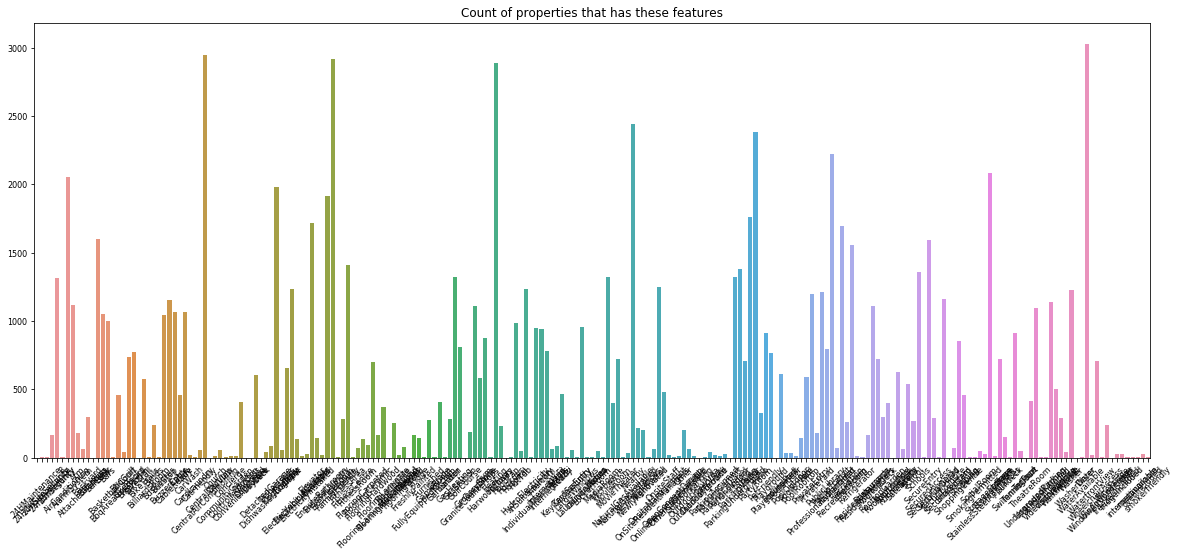

In [11]:
plt.figure(figsize=(20, 8))
count_plot = sns.barplot(column_list, count_list)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=8)
plt.title("Count of properties that has these features")
plt.show()

In [12]:
#Check number of properties greater than a threshold
sum(np.array(count_list) >= 30)

140

In [13]:
#Sanity check to see if there are non str in the column
for i in rental_data.bedroom_num:
    if type(i) != str:
        print(i)

In [14]:
#Expand price, room type, bedroom, bathroom into multiple rows
name_cols = ["price", "url", "room_type", "bedroom_num", "bathroom_num"]
result_price = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.price.split(",")])
result_room = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.room_type.split(",")])
result_bednum = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.bedroom_num.split(",")])
result_bathnum = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.bathroom_num.split(",")])
concat_result = pd.concat([result_price, result_room], axis = 1).iloc[:, :-1]
concat_result_2 = pd.concat([concat_result, result_bednum], axis = 1).iloc[:, :-1]
concat_result_3 = pd.concat([concat_result_2, result_bathnum], axis = 1).iloc[:, :-1]
concat_result_3.columns = name_cols
concat_result_3.head()

,price,url,room_type,bedroom_num,bathroom_num
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom,'1.0','1.0'
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom,'1.0','1.0'
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom,'2.0','1.0'
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom,'1.0','1.0'
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom,'2.0','1.0'


In [15]:
def convert_str_to_num(x):
    '''
    Convert bedroom and bathroom column to numbers
    '''
    num = 0
    if type(x) != str:
        return 0
    else:
        for char in x:
            step = 0
            if char.isdigit():
                if step == 0:
                    num += float(char)
                    step += 1
                else:
                    num += float(char)/10
        return num

In [16]:
concat_result_3['bedroom_num'] = concat_result_3['bedroom_num'].apply(lambda x: convert_str_to_num(x))
concat_result_3['bathroom_num'] = concat_result_3['bathroom_num'].apply(lambda x: convert_str_to_num(x))

In [17]:
test_df = rental_data.drop(columns=['price', 'room_type', 'bathroom_num', 'bedroom_num'])

In [18]:
test_df.head()

,name,latitude,longitude,url,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,120 Raglan Avenue,43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310-312 Lonsdale Road,43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35 Walmer Road,43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50 Spadina Road,43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,730 Dovercourt Road - Doversquare Apartments,43.660713,-79.429237,https://rentals.ca/toronto/730-dovercourt-road...,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Merge the processed data together
processed_rental = pd.merge(concat_result_3,test_df,on=['url'])
processed_rental.shape

(7142, 228)

In [20]:
processed_rental.head()

,price,url,room_type,bedroom_num,bathroom_num,name,latitude,longitude,location,24HMaintenance,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom,1.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom,1.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom,2.0,1.0,120 Raglan Avenue,43.686516,-79.421005,York,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom,1.0,1.0,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom,2.0,1.0,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# def convert_bedroom(room):
#     room = re.sub('[^a-zA-Z0-9 \n\.]', ' ', room)
    
#     if len(room.split()) == 1:
#         if room.startswith('1BR'):
#             return 1
#         elif room.startswith('2BR'):
#             return 2
#         elif room.startswith('3BR'):
#             return 3
#     else:
#         if (room.split()[0] == '1' or room.split()[0].lower() == 'one' or room.split()[0] == '1.0' or
#             room.split()[1] == '1' or room.split()[1].lower() == 'one' or room.startswith('1BR') or
#             room.split()[1] == '1BR' or room == '2304 Weston Rd   Plan I' or room == 'Garden Villas'):
#             return 1
#         if (room.split()[0] == '2' or room.split()[0].lower() == 'two' or room.split()[0] == '2.0' or
#             room.split()[1] == '2' or room.split()[1].lower() == 'two' or room.startswith('2BR') or
#             room.split()[1] == '2BR' or room == '2336 Weston Rd   Plan A' or room == 'Garden Villa 2 bedroom suite'):
#             return 2
#         if (room.split()[0] == '3' or room.split()[0].lower() == 'three' or room.split()[0] == '3.0' or
#             room.split()[1] == '3' or room.split()[1].lower() == 'three' or room.startswith('3BR') or
#             room.split()[1] == '3BR'):
#             return 3
#         if (room.split()[0] == '4' or room.split()[0].lower() == 'four' or room.split()[0] == '4.0' or
#             room.split()[1] == '4' or room.split()[1].lower() == 'four' or room.startswith('4BR')):
#             return 4
#         if room.split()[0] == '5':
#             return 5
#         if room.split()[0] == '6':
#             return 6
#         if (room.split()[0] == '0' or room.split()[0] == '0.0' or room.split()[0] == '0.5' or
#             room.startswith('Bachelor') or room == 'Furnished Studio' or room == '4K Spadina Avenue' or
#            room == '461 Adelaide Street West' or room == '25 Lower Simcoe' or room == 'Condo Unit' or
#            room == '637 Lakeshore Blvd'):
#             return 0.5
#         if room == '1.5 Bedroom' or room == 'Jr Suite':
#             return 1.5
#         if room == '2.5 Bedroom':
#             return 2.5
#         if room == '3.5 Bedroom':
#             return 3.5
#         if room == '4.5 Bedroom':
#             return 4.5
#         else:
#             return room

In [22]:
# processed_rental['bedroom_num'] = processed_rental.room_type.apply(lambda x: convert_bedroom(x))
# processed_rental['bedroom_num'] = processed_rental['bedroom_num'].fillna(value=0)

In [23]:
#Remove duplicates
processed_rental = processed_rental.drop_duplicates()
sum(processed_rental.duplicated())

0

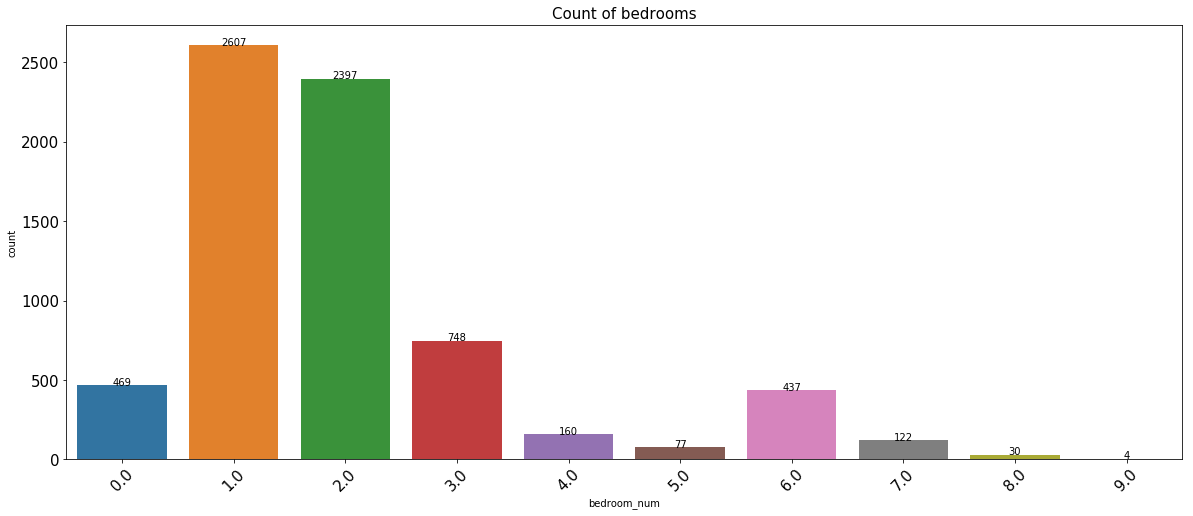

In [24]:
#Plot bedroom counts
plt.figure(figsize=(20, 8))
count_plot = sns.countplot(processed_rental.bedroom_num)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=15)
for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x()+p.get_width()/2., height,height,ha="center")
plt.title("Count of bedrooms", fontsize = 15)
plt.show()

In [25]:
processed_rental.location.unique()

array(['York', 'Toronto', 'NorthYork', 'Etobicoke', 'Scarborough',
       'EastYork', 'Markham', 'Thornhill', 'Mississauga', 'Vaughan',
       'Concord'], dtype=object)

In [26]:
max(processed_rental.price), min(processed_rental.price)

('990.0', '1.0')

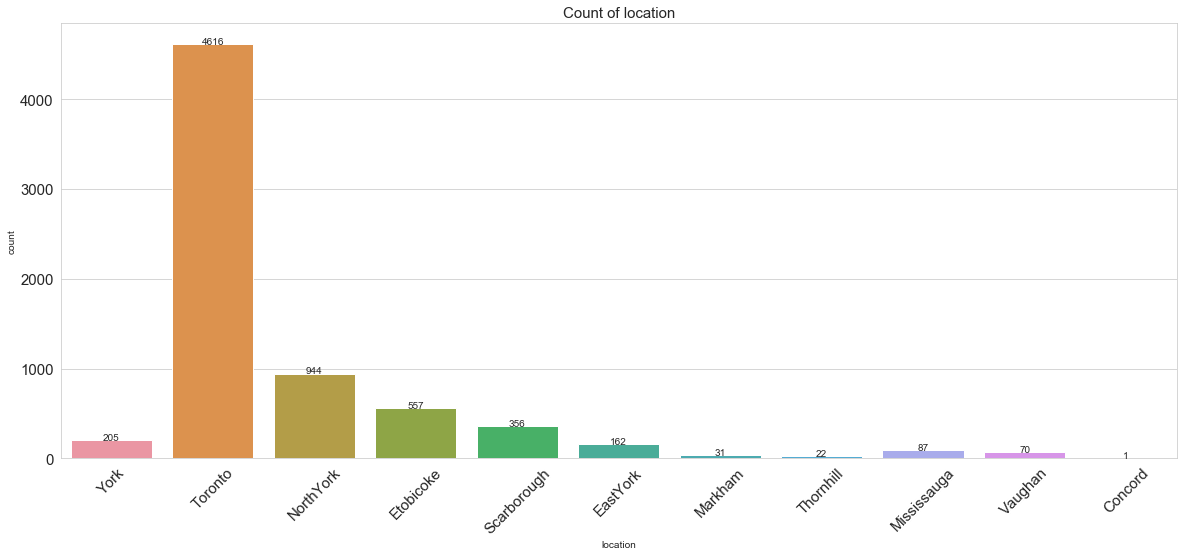

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
count_plot = sns.countplot(processed_rental.location)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=15)
plt.title("Count of location", fontsize = 15)
for p in count_plot.patches:
    height = p.get_height()
    count_plot.text(p.get_x()+p.get_width()/2., height,height,ha="center")
plt.show()

In [28]:
processed_rental.price = processed_rental.price.astype(float)

In [29]:
processed_rental[processed_rental['price'] == 1]

,price,url,room_type,bedroom_num,bathroom_num,name,latitude,longitude,location,24HMaintenance,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
4991,1.0,https://rentals.ca/toronto/972-bathurst-st-unit-2,None,3.0,2.0,972 Bathurst St | Unit: 2,43.669755,-79.41323,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5236,1.0,https://rentals.ca/toronto/972-bathurst-st-unit-1,None,1.0,1.0,972 Bathurst St | Unit: 1,43.669755,-79.41323,Toronto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def div_region(col, num_of_region = 10):
    final = {}
    max_num, min_num = 7741.5, 300
    interegion = (max_num - min_num)/10
    start = min_num
    for i in range(10):
        num = sum(col <= start + interegion) - sum(col <= start)
        final[str(round(start, 2)) + " ~ " + str(round(start + interegion, 2))] = num
        start += interegion
    return final

In [31]:
sum(processed_rental['price'] <= 300)

2

In [32]:
div_region(processed_rental.price)

{'300 ~ 1044.15': 133,
 '1044.15 ~ 1788.3': 802,
 '1788.3 ~ 2532.45': 3672,
 '2532.45 ~ 3276.6': 1570,
 '3276.6 ~ 4020.75': 587,
 '4020.75 ~ 4764.9': 123,
 '4764.9 ~ 5509.05': 66,
 '5509.05 ~ 6253.2': 32,
 '6253.2 ~ 6997.35': 25,
 '6997.35 ~ 7741.5': 13}

#### Add Den column

In [33]:
den_col = []
for room in list(processed_rental.room_type.str.lower()):
    if "den" in room:
        den_col.append(1)
    else:
        den_col.append(0)
processed_rental['HasDen'] = den_col

#### Cat, Dog and Pet Friendly Column
- Since Cat friendly and dog friendly columns are identical, we can keep one the column and rename it cat_dogFriendly.
- Pet Friendly column contains all cat and dog friendly column but even more
- We would just keep pet friendly column and discard cat and dog column

In [34]:
processed_rental = processed_rental.drop(columns = ['DogFriendly', 'CatFriendly'])

#### Dishwasher and DishwasherAvaliable column
#### Recreation and RecreationRoom column

#### 'FitnessArea', 'FitnessCentre','FitnessRoom' column

- Both column contains records that are not in each other's column. Since they are representing the same thing, we combine them together

In [35]:
def process_dishwasher(x):
    if x['Dishwasher'] == 1 or x['DishwasherAvailable'] == 1:
        return 1
    else:
        return 0

processed_rental['DishWasher_ava'] = processed_rental.apply(lambda x: process_dishwasher(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Dishwasher', 'DishwasherAvailable'])

In [36]:
def process_recreation(x):
    if x['RecreationRoom'] == 1 or x['Recreation'] == 1:
        return 1
    else:
        return 0

processed_rental['Recreation_ava'] = processed_rental.apply(lambda x: process_recreation(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Recreation', 'RecreationRoom'])

In [37]:
def process_fitness(x):
    if (x['FitnessArea'] == 1 or x['FitnessCentre'] == 1 or x['FitnessRoom'] == 1 or 
        x['Recreation_ava'] == 1  or x['Gym'] == 1 or x['gym'] == 1 or x['BikeRoom'] == 1 or
       x['ExerciseRoom'] == 1):
        return 1
    else:
        return 0

processed_rental['Recreation_ava'] = processed_rental.apply(lambda x: process_fitness(x), axis = 1)
processed_rental = processed_rental.drop(columns=['FitnessArea', 'FitnessCentre', 'FitnessRoom', 'Gym', 'gym'
                                                  , 'BikeRoom', 'ExerciseRoom'])

#### OutDoorPlayArea and outdoorplayground, playground and playgroundpark

- Outdoor play area contains all outdoor playground and they are the same meaning
- delete outdoor playground column
- merge all others

In [38]:
processed_rental = processed_rental.drop(columns=['OutdoorPlayground'])

In [39]:
def process_playground(x):
    if x['Playground'] == 1 or x['OutdoorPlayArea'] == 1 or x['PlaygroundPark'] == 1:
        return 1
    else:
        return 0

processed_rental['Playground_ava'] = processed_rental.apply(lambda x: process_playground(x), axis = 1)
processed_rental = processed_rental.drop(columns=['OutdoorPlayArea', 'PlaygroundPark', 'Playground'])

#### 'freezerincluded', 'fridgeincluded', 'Refrigerator' ,'Freezer' column
#### 'shopping & shopping centre' , 'school and schools'
 - Merge them all

In [40]:
def process_fridge(x):
    if x['freezerincluded'] == 1 or x['fridgeincluded'] == 1 or x['Refrigerator'] == 1 or x['Freezer']==1 or x['Fridge'] == 1:
        return 1
    else:
        return 0

processed_rental['fridge_ava'] = processed_rental.apply(lambda x: process_fridge(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Refrigerator', 'fridgeincluded', 'freezerincluded','Freezer', 'Fridge'])

In [41]:
def process_shopping(x):
    if x['Shopping'] == 1 or x['ShoppingCentre'] == 1 or x['ConvenienceStore'] == 1:
        return 1
    else:
        return 0

processed_rental['Shopping_ava'] = processed_rental.apply(lambda x: process_shopping(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Shopping', 'ShoppingCentre', 'ConvenienceStore'])

In [42]:
def process_school(x):
    if x['Schools'] == 1 or x['School'] == 1:
        return 1
    else:
        return 0

processed_rental['School_ava'] = processed_rental.apply(lambda x: process_school(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Schools', 'School'])

In [43]:
def process_balcony(x):
    if x['Balcony'] == 1 or x['Balconies'] == 1:
        return 1
    else:
        return 0

processed_rental['Balcony_ava'] = processed_rental.apply(lambda x: process_balcony(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Balcony', 'Balconies'])

In [44]:
def process_bbq(x):
    if x['BbqAreaCourtyard'] == 1 or x['BbqGrill'] == 1:
        return 1
    else:
        return 0

processed_rental['Bbq_ava'] = processed_rental.apply(lambda x: process_bbq(x), axis = 1)
processed_rental = processed_rental.drop(columns=['BbqAreaCourtyard', 'BbqGrill'])

In [45]:
def process_bike(x):
    if x['BikeTrail'] == 1 or x['BikeTrails'] == 1 or x['BikeRacks'] == 1:
        return 1
    else:
        return 0

processed_rental['Biketrail_ava'] = processed_rental.apply(lambda x: process_bike(x), axis = 1)
processed_rental = processed_rental.drop(columns=['BikeTrail', 'BikeTrails', 'BikeRacks'])

In [46]:
def process_elevator(x):
    if x['Elevator'] == 1 or x['Elevators'] == 1:
        return 1
    else:
        return 0

processed_rental['Elevator_ava'] = processed_rental.apply(lambda x: process_elevator(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Elevator', 'Elevators'])

In [47]:
def process_insuitelaundry(x):
    if x['EnsuiteLaundry'] == 1 or x['InSuiteLaundry'] == 1:
        return 1
    else:
        return 0

processed_rental['InSuiteLaundry_ava'] = processed_rental.apply(lambda x: process_insuitelaundry(x), axis = 1)
processed_rental = processed_rental.drop(columns=['EnsuiteLaundry', 'InSuiteLaundry'])

In [48]:
def process_laundryroom(x):
    if x['LaundryRoom'] == 1 or x['LaundryFacilities'] == 1 or x['CardLaundry'] == 1: 
        return 1
    else:
        return 0

processed_rental['LaundryRoom_ava'] = processed_rental.apply(lambda x: process_laundryroom(x), axis = 1)
processed_rental = processed_rental.drop(columns=['LaundryRoom', 'LaundryFacilities', 'CardLaundry'])

In [49]:
def process_underparking(x):
    if x['ParkingUnderground'] == 1 or x['UndergroundParking'] == 1 or x['ParkingCovered'] == 1 or x['ParkingIndoor'] == 1 or x['ParkingCarport'] == 1:
        return 1
    else:
        return 0

processed_rental['Parkingindoor_ava'] = processed_rental.apply(lambda x: process_underparking(x), axis = 1)
processed_rental = processed_rental.drop(columns=['ParkingUnderground', 'UndergroundParking', 'ParkingCovered', 'ParkingIndoor', 'ParkingCarport'])

In [50]:
def process_rooftoppool(x):
    if x['PoolRooftop'] == 1 or x['RooftopPool'] == 1:
        return 1
    else:
        return 0

processed_rental['RooftopPool_ava'] = processed_rental.apply(lambda x: process_rooftoppool(x), axis = 1)
processed_rental = processed_rental.drop(columns=['PoolRooftop', 'RooftopPool'])

In [51]:
def process_Manager(x):
    if x['OnSiteResidentManagers'] == 1 or x['OnsiteManagement'] == 1 or x['ProfessionallyManaged'] == 1 or x['ResidentManagers'] == 1:
        return 1
    else:
        return 0

processed_rental['Manager_ava'] = processed_rental.apply(lambda x: process_Manager(x), axis = 1)
processed_rental = processed_rental.drop(columns=['OnSiteResidentManagers', 'OnsiteManagement'
                                                  ,'ProfessionallyManaged','ResidentManagers'])

In [52]:
def process_storage(x):
    if x['Storage'] == 1 or x['StorageLockers'] == 1 or x['StorageRoom'] == 1:
        return 1
    else:
        return 0

processed_rental['Storage_ava'] = processed_rental.apply(lambda x: process_storage(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Storage', 'StorageLockers','StorageRoom'])

In [53]:
def process_washer(x):
    if x['Washer'] == 1 or x['WasherDryer'] == 1 :
        return 1
    else:
        return 0

processed_rental['Washer_ava'] = processed_rental.apply(lambda x: process_washer(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Washer', 'WasherDryer'])

In [54]:
def process_pool(x):
    if x['Pool'] == 1 or x['SwimmingPool'] == 1 :
        return 1
    else:
        return 0

processed_rental['Pool_ava'] = processed_rental.apply(lambda x: process_pool(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Pool', 'SwimmingPool'])

In [55]:
def process_securedentry(x):
    if x['SecureEntry'] == 1 or x['SecuredAccess'] == 1 :
        return 1
    else:
        return 0

processed_rental['SecureEntry_ava'] = processed_rental.apply(lambda x: process_securedentry(x), axis = 1)
processed_rental = processed_rental.drop(columns=['SecureEntry', 'SecuredAccess'])

In [56]:
def process_publictransit(x):
    if x['BusRoutes'] == 1 or x['BusStop'] == 1 or x['PublicTransit'] == 1:
        return 1
    else:
        return 0

processed_rental['publictransit_ava'] = processed_rental.apply(lambda x: process_publictransit(x), axis = 1)
processed_rental = processed_rental.drop(columns=['BusRoutes', 'BusStop', 'PublicTransit'])

In [57]:
def process_internet(x):
    if (x['Cable'] == 1 or x['CableReady'] == 1 or x['internetavailable'] == 1 or x['InternetReady'] == 1
        or x['InternetWiFi'] == 1 or x['Intercom'] ==  1 or x['OtherCableInstalled'] == 1):
        return 1
    else:
        return 0

processed_rental['Internet_ava'] = processed_rental.apply(lambda x: process_internet(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Cable', 'CableReady'
                                                  ,'internetavailable','InternetReady', 
                                                 'InternetWiFi', 'Intercom', 'OtherCableInstalled'])

In [58]:
def process_electricity(x):
    if x['ElectricityAvailable'] == 1 or x['ElectricityInstalled'] == 1 or x['HydroElectricity'] == 1 or x['UtilitiesIncluded']==1:
        return 1
    else:
        return 0

processed_rental['Electricity_ava'] = processed_rental.apply(lambda x: process_electricity(x), axis = 1)
processed_rental = processed_rental.drop(columns=['ElectricityAvailable', 'ElectricityInstalled','HydroElectricity'])

In [59]:
def process_water(x):
    if x['Water'] == 1 or x['WaterAvailable'] == 1 or x['UtilitiesIncluded']==1:
        return 1
    else:
        return 0

processed_rental['Water_ava'] = processed_rental.apply(lambda x: process_water(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Water', 'WaterAvailable'])

In [60]:
def process_Gas(x):
    if x['NaturalGasAvailable'] == 1 or x['NaturalGasInstalled'] == 1 or x['UtilitiesIncluded']==1:
        return 1
    else:
        return 0

processed_rental['Gas_ava'] = processed_rental.apply(lambda x: process_Gas(x), axis = 1)
processed_rental = processed_rental.drop(columns=['NaturalGasAvailable', 'NaturalGasInstalled'])

In [61]:
processed_rental=processed_rental.drop(columns=['UtilitiesIncluded','EnsuiteBathroom','8','Nearby'])     

In [62]:
def process_security(x):
    if (x['24HOnSiteSecurity'] == 1 or x['24HSurveillance'] == 1 or 
        x['24hSecurity']==1 or x['AlarmSystem']==1 or x['KeyCardSecurity']==1 
        or x['OnsiteStaff'] == 1 or x['VideoSurveillance'] == 1 or x['SecuritySystem'] == 1 
        or x['SecurityOnsite'] == 1 or x['SecurityGuard'] == 1 or x['NightPatrol'] == 1
       or x['SecurityCameras'] == 1):
        return 1
    else:
        return 0

processed_rental['Security_ava'] = processed_rental.apply(lambda x: process_security(x), axis = 1)
processed_rental = processed_rental.drop(columns=['24HOnSiteSecurity', '24HSurveillance', '24hSecurity', 'AlarmSystem', 'KeyCardSecurity', 'OnsiteStaff', 'VideoSurveillance', 'SecuritySystem', 'SecurityOnsite', 'SecurityGuard','NightPatrol', 'SecurityCameras'])

In [63]:
def process_furnish(x):
    if x['Furnished'] == 1 or x['NewlyRenovated'] == 1 :
        return 1
    else:
        return 0

processed_rental['Furnish_ava'] = processed_rental.apply(lambda x: process_furnish(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Furnished', 'NewlyRenovated'])

In [64]:
def process_hottub(x):
    if x['Jacuzzi'] == 1 or x['HotTub'] == 1 :
        return 1
    else:
        return 0

processed_rental['hottub_ava'] = processed_rental.apply(lambda x: process_hottub(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Jacuzzi', 'HotTub'])

In [65]:
def process_movie_room(x):
    if x['TheatreRoom'] == 1 or x['MovieRoom'] == 1 or x['MediaRoom']==1:
        return 1
    else:
        return 0

processed_rental['movieroom_ava'] = processed_rental.apply(lambda x: process_movie_room(x), axis = 1)
processed_rental = processed_rental.drop(columns=['TheatreRoom', 'MovieRoom', 'MediaRoom'])

In [66]:
def process_vistorparking(x):
    if x['ParkingVisitor'] == 1 or x['VisitorParking'] == 1 :
        return 1
    else:
        return 0

processed_rental['vistorparking_ava'] = processed_rental.apply(lambda x: process_vistorparking(x), axis = 1)
processed_rental = processed_rental.drop(columns=['ParkingVisitor', 'VisitorParking'])

In [67]:
def process_heating(x):
    if x['GasHeating'] == 1 or x['Heating'] == 1 or x['RadiantHeat']==1:
        return 1
    else:
        return 0

processed_rental['heating_ava'] = processed_rental.apply(lambda x: process_heating(x), axis = 1)
processed_rental = processed_rental.drop(columns=['GasHeating', 'Heating', 'RadiantHeat'])

In [68]:
def process_parking(x):
    if x['Parking'] == 1 or x['ParkingAssigned'] == 1 or x['OutdoorParking']==1:
        return 1
    else:
        return 0

processed_rental['parking_ava'] = processed_rental.apply(lambda x: process_parking(x), axis = 1)
processed_rental = processed_rental.drop(columns=['Parking', 'ParkingAssigned', 'OutdoorParking'])

In [69]:
def process_garage(x):
    if x['AttachedParking'] == 1 or x['Garage'] == 1 or x['DetachedGarage']==1:
        return 1
    else:
        return 0

processed_rental['garage_ava'] = processed_rental.apply(lambda x: process_garage(x), axis = 1)
processed_rental = processed_rental.drop(columns=['AttachedParking', 'Garage', 'DetachedGarage'])

In [70]:
def process_stove(x):
    if x['ovenincluded'] == 1 or x['Stove'] == 1 :
        return 1
    else:
        return 0

processed_rental['stove_ava'] = processed_rental.apply(lambda x: process_stove(x), axis = 1)
processed_rental = processed_rental.drop(columns=['ovenincluded', 'Stove'])

In [71]:
def process_smoking(x):
    if x['SmokingPermitted'] == 1 or x['smokerfriendly'] == 1 :
        return 1
    else:
        return 0

processed_rental['smoking_ava'] = processed_rental.apply(lambda x: process_smoking(x), axis = 1)
processed_rental = processed_rental.drop(columns=['SmokingPermitted', 'smokerfriendly'])

In [72]:
def process_partyroom(x):
    if x['PartyRoom'] == 1 or x['SocialRoom'] == 1 or x['BilliardsRoom']==1 or x['GameRoom'] == 1:
        return 1
    else:
        return 0

processed_rental['partyroom_ava'] = processed_rental.apply(lambda x: process_partyroom(x), axis = 1)
processed_rental = processed_rental.drop(columns=['PartyRoom', 'SocialRoom', 'BilliardsRoom','GameRoom'])

In [73]:
def process_kitchen(x):
    if x['FullyEquippedKitchen'] == 1 or x['UpgradedKitchen'] == 1 :
        return 1
    else:
        return 0

processed_rental['fancykitchen_ava'] = processed_rental.apply(lambda x: process_kitchen(x), axis = 1)
processed_rental = processed_rental.drop(columns=['FullyEquippedKitchen', 'UpgradedKitchen'])

In [74]:
#processed_rental['Playground'].equals(processed_rental['OutdoorPlayArea'])

In [75]:
#sum(processed_rental[processed_rental['Playground'] != processed_rental['OutdoorPlayArea']]['Playground']) 

In [76]:
list(processed_rental.columns)

['price',
 'url',
 'room_type',
 'bedroom_num',
 'bathroom_num',
 'name',
 'latitude',
 'longitude',
 'location',
 '24HMaintenance',
 '24hEmergency',
 'AirConditioning',
 'Atm',
 'Backyard',
 'Bank',
 'Bars',
 'BasketballCourt',
 'Blinds',
 'BuzzerEntry',
 'Cafe',
 'CarWash',
 'CentralAirConditioning',
 'CentralVacuum',
 'Church',
 'CityView',
 'CommunityGarden',
 'Concierge',
 'ControlledAccess',
 'Cooktop',
 'Courtyard',
 'Daycare',
 'Deck',
 'DogPark',
 'Dryer',
 'ElectricVehicleCharger',
 'FamilyFriendly',
 'Fireplace',
 'FlooringCarpeted',
 'FlooringCeramic',
 'FlooringHardwood',
 'FlooringLaminateHardwood',
 'FlooringLaminate',
 'FlooringMixedOptions',
 'FlooringTile',
 'FlooringVinyl',
 'FlooringWood',
 'FreshlyPainted',
 'Garburator',
 'Garden',
 'GasStation',
 'GolfCourse',
 'GraniteCountertops',
 'GroceryStore',
 'GuestSuite',
 'HarwoodFloors',
 'Highway',
 'HoodFan',
 'Hookups',
 'Hospital',
 'IndividualThermostats',
 'Island',
 'KeylessEntry',
 'LargeWindows',
 'LockerRoom'

In [77]:
len(processed_rental.columns)

143

In [80]:
#Drop room_type, url, name column
final_df = processed_rental.drop(columns=['room_type', 'url', 'name'])

In [81]:
final_df.to_csv("Final_rental_big.csv", index = False)